<a href="https://colab.research.google.com/github/Fatma-Chaouech/NLP/blob/main/Semantic_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the data

In [ ]:
import pandas as pd
import re
import spacy
import string
import numpy as np
import gensim
from spacy.matcher import Matcher


In [ ]:
valid = pd.read_csv("/content/drive/MyDrive/datasets/movies/Train.csv")
# valid = pd.read_csv("/content/drive/MyDrive/datasets/movies/Valid.csv")
#test = pd.read_csv("/content/drive/MyDrive/datasets/movies/Test.csv")

In [ ]:
# dataset = pd.concat([train,valid])
# dataset.reset_index(inplace = True)
# dataset.head()
valid.text[0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

### Clean and pre-process the data

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def spacy_tokenizer(sentence):

  sentence = re.sub('\'','',sentence)
  sentence = re.sub('\w*\d\w*','',sentence)
  sentence = re.sub('\([^(]*\)','',sentence)
  sentence = re.sub('\<[^<]*\>','',sentence)
  sentence = re.sub(r'\n',' ',sentence)
  #remove punctunations
  sentence = re.sub(r'[^\w\s]',' ',sentence)
  sentence = re.sub(' +',' ',sentence)
  tokens= nlp(sentence)
  tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
  tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]
  return tokens

In [ ]:
valid['text'] = valid['text'].map(lambda x: spacy_tokenizer(x))
valid.text

0        [grow, watch, love, thunderbirds, mate, school...
1        [movie, dvd, player, sit, coke, chip, expectat...
2        [people, know, particular, time, past, like, f...
3        [great, interest, biblical, movie, bored, deat...
4        [die, hard, dads, army, fan, change, tape, dvd...
                               ...                        
39995    [western, union, forget, classic, western, rea...
39996    [movie, incredible, piece, work, explore, nook...
39997    [wife, watch, movie, plan, visit, sicily, stro...
39998    [watch, flatliners, amazed, necessary, feature...
39999    [film, good, gross, estimate, award, nominatio...
Name: text, Length: 40000, dtype: object

In [ ]:
valid.text

0        [grow, watch, love, thunderbirds, mate, school...
1        [movie, dvd, player, sit, coke, chip, expectat...
2        [people, know, particular, time, past, like, f...
3        [great, interest, biblical, movie, bored, deat...
4        [die, hard, dads, army, fan, change, tape, dvd...
                               ...                        
39995    [western, union, forget, classic, western, rea...
39996    [movie, incredible, piece, work, explore, nook...
39997    [wife, watch, movie, plan, visit, sicily, stro...
39998    [watch, flatliners, amazed, necessary, feature...
39999    [film, good, gross, estimate, award, nominatio...
Name: text, Length: 40000, dtype: object

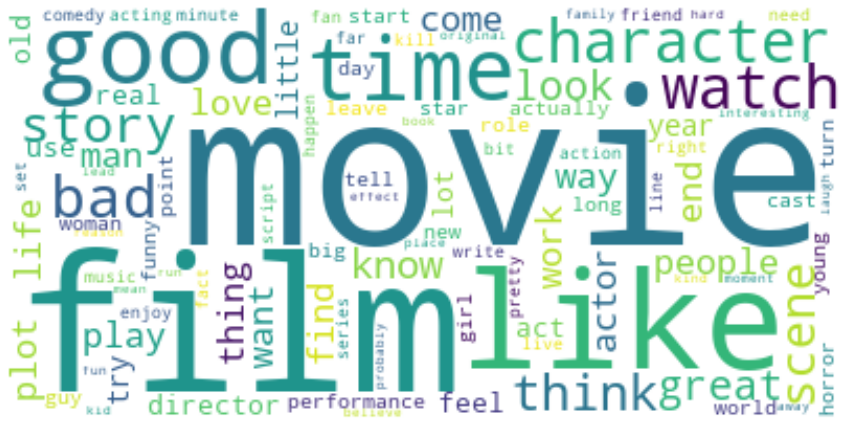

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(valid['text'])).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Building Word Dictionary

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(valid['text'])

dictionary.filter_extremes(no_below=4, no_above=0.2)

stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['acceptable', 0], ['alan', 1], ['anderson', 2], ['art', 3], ['bitterly', 4], ['cgi', 5], ['chair', 6], ['channel', 7], ['child', 8], ['compare', 9], ['completely', 10], ['counting', 11], ['create', 12], ['director', 13], ['disappointing', 14], ['early', 15], ['error', 16], ['form', 17], ['gerry', 18], ['glimpse', 19], ['grow', 20], ['hand', 21], ['high', 22], ['homo', 23], ['hope', 24], ['hopeless', 25], ['huge', 26], ['judgment', 27], ['lunch', 28], ['marionette', 29], ['mate', 30], ['morning', 31], ['original', 32], ['point', 33], ['remake', 34], ['replace', 35], ['rerun', 36], ['rubbish', 37], ['sapiens', 38], ['saturday', 39], ['school', 40], ['score', 41], ['scott', 42], ['series', 43], ['snappy', 44], ['television', 45], ['thankfully', 46], ['theme', 47], ['thunderbird', 48], ['thunderbirds', 49], ['tune', 50]]]


In [ ]:
corpus = [dictionary.doc2bow(desc) for desc in valid.text]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('acceptable', 1), ('alan', 1), ('anderson', 1), ('art', 1), ('bitterly', 1), ('cgi', 1), ('chair', 1), ('channel', 1), ('child', 2), ('compare', 1), ('completely', 1), ('counting', 1), ('create', 1), ('director', 1), ('disappointing', 1), ('early', 1), ('error', 1), ('form', 1), ('gerry', 1), ('glimpse', 1), ('grow', 1), ('hand', 1), ('high', 1), ('homo', 1), ('hope', 1), ('hopeless', 1), ('huge', 1), ('judgment', 1), ('lunch', 1), ('marionette', 1), ('mate', 1), ('morning', 1), ('original', 1), ('point', 1), ('remake', 1), ('replace', 1), ('rerun', 1), ('rubbish', 1), ('sapiens', 2), ('saturday', 1), ('school', 3), ('score', 1), ('scott', 1), ('series', 1), ('snappy', 1), ('television', 1), ('thankfully', 1), ('theme', 1), ('thunderbird', 1), ('thunderbirds', 2), ('tune', 1), ('utter', 1), ('version', 1), ('virgil', 1), ('want', 2), ('waste', 1), ('wife', 1)], [('channel', 1), ('hope', 1), ('point', 2), ('replace', 1), ('series', 1), ('actual', 1), ('adventurous', 1), ('animation',

In [ ]:
movie_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
movie_lsi_model = gensim.models.LsiModel(movie_tfidf_model[corpus], id2word=dictionary, num_topics=300)

In [ ]:
gensim.corpora.MmCorpus.serialize('movie_tfidf_model_mm', movie_tfidf_model[corpus])
gensim.corpora.MmCorpus.serialize('movie_lsi_model_mm',movie_lsi_model[movie_tfidf_model[corpus]])

In [ ]:
movie_tfidf_corpus = gensim.corpora.MmCorpus('movie_tfidf_model_mm')
movie_lsi_corpus = gensim.corpora.MmCorpus('movie_lsi_model_mm')

print(movie_tfidf_corpus)
print(movie_lsi_corpus)

MmCorpus(40000 documents, 29734 features, 2659619 non-zero entries)
MmCorpus(40000 documents, 300 features, 12000000 non-zero entries)


### Find Similar Movies

In [ ]:
from gensim.similarities import MatrixSimilarity

movie_index = MatrixSimilarity(movie_lsi_corpus, num_features = movie_lsi_corpus.num_terms)

In [ ]:
def title(description) :
  desc = ' '.join(description)
  doc = nlp(desc)
  matcher = Matcher(nlp.vocab)
  pattern = [{'POS': 'PROPN','OP':'+'}]
  matcher.add("PROPER_NOUN",[pattern], greedy="LONGEST")
  matches = matcher(doc)
  matches.sort(key = lambda x: x[1]) 
  similar = [doc[match[1]:match[2]] for match in matches]
  return similar

In [ ]:
from operator import itemgetter

def search_similar_movies(search_term):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = movie_tfidf_model[query_bow]
    query_lsi = movie_lsi_model[query_tfidf]

    movie_index.num_best = 5

    movies_list = movie_index[query_lsi]

    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []

    for j, movie in enumerate(movies_list):

        movie_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Movie Title': title(valid['text'][movie[0]]),
                'Movie Plot': valid['text'][movie[0]]
            }

        )
        if j == (movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Relevance','Movie Title','Movie Plot'])

In [ ]:
valid['text'][0]

['grow',
 'watch',
 'love',
 'thunderbirds',
 'mate',
 'school',
 'watch',
 'play',
 'thunderbird',
 'school',
 'lunch',
 'school',
 'want',
 'virgil',
 'scott',
 'want',
 'alan',
 'counting',
 'art',
 'form',
 'child',
 'movie',
 'hope',
 'glimpse',
 'love',
 'child',
 'bitterly',
 'disappointing',
 'high',
 'point',
 'snappy',
 'theme',
 'tune',
 'compare',
 'original',
 'score',
 'thunderbirds',
 'thankfully',
 'early',
 'saturday',
 'morning',
 'television',
 'channel',
 'play',
 'rerun',
 'series',
 'gerry',
 'anderson',
 'wife',
 'create',
 'jonatha',
 'frake',
 'hand',
 'director',
 'chair',
 'version',
 'completely',
 'hopeless',
 'waste',
 'film',
 'utter',
 'rubbish',
 'cgi',
 'remake',
 'acceptable',
 'replace',
 'marionette',
 'homo',
 'sapiens',
 'subsp',
 'sapiens',
 'huge',
 'error',
 'judgment']

In [ ]:
search_similar_movies('award')

,Relevance,Movie Title,Movie Plot
0,76.90,"[(steve, martin), (michael, moore, trunk, limo...","[firmly, believe, good, oscar, ceremony, recen..."
1,76.29,"[(battlestar, galactica, worth, award, answer,...","[award, lose, respect, hugos, distinguished, p..."
2,71.95,"[(reek, teeny, bopper), (mike, bot), (moment),...","[crock, doodoo, win, award, desperate, award, ..."
3,66.21,"[(post), (miss, win, george, peabody), (award,...","[evidently, people, movie, post, comment, movi..."
4,65.29,"[(september, cast, shadow, oscar, award), (mem...","[event, september, cast, shadow, oscar, award,..."


### Word2Vec Similarity Measurement

In [ ]:
from gensim.models.phrases import Phrases, Phraser
from collections import defaultdict 

phrases = Phrases(valid.text, min_count=30, progress_per=10000) 
bigram = Phraser(phrases) # cut down memory consumption of Phrases()
sentences = bigram[valid.text] # returns the bigrams possible from sent
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
print(len(word_freq))

sorted(word_freq, key=word_freq.get, reverse=True)[:10]

84685


['movie',
 'film',
 'good',
 'like',
 'time',
 'watch',
 'character',
 'bad',
 'story',
 'think']

In [ ]:
import multiprocessing

from gensim.models import Word2Vec

cores = multiprocessing.cpu_count() # Count the number of cores in a computer

w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
w2v_model.init_sims(replace=True) # makes the model much more memory-efficient

In [ ]:
w2v_model.wv.most_similar(positive = ['romance'])

[('romantic', 0.3981730341911316),
 ('drama', 0.3969862461090088),
 ('romantic_comedy', 0.36704254150390625),
 ('fairytale', 0.35162943601608276),
 ('comedy_drama', 0.34978342056274414),
 ('story', 0.3428049683570862),
 ('enchanting', 0.33845987915992737),
 ('chick_flick', 0.3328304886817932),
 ('love', 0.3269526958465576),
 ('relationship', 0.32455551624298096)]

In [ ]:
w2v_model.wv.similarity('cliché','romance')

0.13311812

In [ ]:
w2v_model.wv.similarity('cliché','passion')

-0.022195132

In [ ]:
w2v_model.wv.most_similar(positive=['romance','scared'],negative=['horror'],topn=1)

[('fall_love', 0.39501070976257324)]

In [ ]:
w2v_model.wv.most_similar(positive=['drama','funny'],negative=['comedy'],topn=3)

[('interesting', 0.3733008801937103),
 ('storyline', 0.37319415807724),
 ('story', 0.3533213138580322)]